# Data Analysis on the Brazilian E-Commerce Public Dataset by Olist
Author : Kelompok 18-D [Arif Widagdo, Jonatan Jeremi, Muhammad Idz, Wandi Wardiman]

Description : This notebook is our first assignment at SIB E-Commerce to take the first step in implementing data cleaning, data integration and data visualization

Outline :
1. Data Cleaning
2. Data Integration
3. Visualisasi Data

## Import Library

In [48]:
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
import os
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap

sns.set() 

## Data Extraction

In [2]:
## read list dataset in directory data
os.listdir("../data")

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [3]:
## check empty value
missing_values = ["?","N/a","na",np.nan]
## read dataset
olist_customers = pd.read_csv("../data/olist_customers_dataset.csv" , na_values = missing_values)
olist_geolocation = pd.read_csv("../data/olist_geolocation_dataset.csv" , na_values = missing_values)
olist_order_items = pd.read_csv("../data/olist_order_items_dataset.csv" , na_values = missing_values)
olist_order_payments = pd.read_csv("../data/olist_order_payments_dataset.csv" , na_values = missing_values)
olist_order_reviews = pd.read_csv("../data/olist_order_reviews_dataset.csv" , na_values = missing_values)
olist_orders = pd.read_csv("../data/olist_orders_dataset.csv" , na_values = missing_values)
olist_products = pd.read_csv("../data/olist_products_dataset.csv" , na_values = missing_values)
olist_sellers = pd.read_csv("../data/olist_sellers_dataset.csv" , na_values = missing_values)
product_category_name_translation= pd.read_csv("../data/product_category_name_translation.csv" , na_values = missing_values)

## 1. Data Cleaning

### - olist_customers_dataset

In [4]:
olist_customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


### - olist_geolocation_dataset

In [5]:
olist_geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


### - olist_order_items_dataset

In [6]:
olist_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


### - olist_order_payments_dataset

In [7]:
olist_order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


### - olist_order_reviews_dataset

In [8]:
olist_order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


#### check empty value in olist_order_reviews_dataset

In [9]:
olist_order_reviews.shape

(99224, 7)

In [10]:
olist_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87657
review_comment_message     58251
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
olist_order_reviews.isnull().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

In [12]:
# sns.heatmap(olist_order_reviews.isnull(), yticklabels=False)

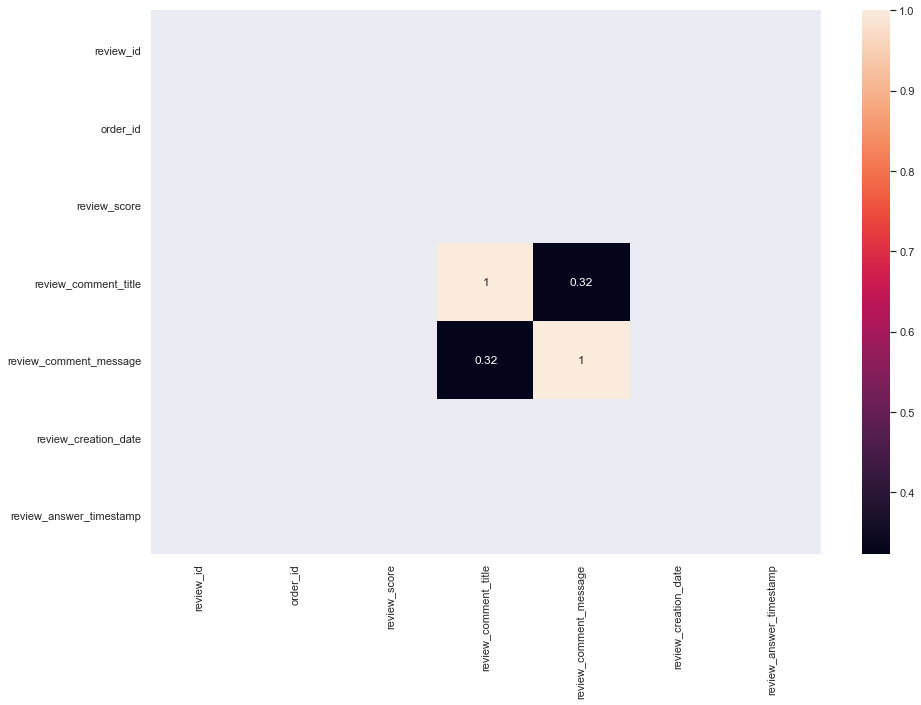

In [13]:
plt.figure(figsize=(15,10))

sns.heatmap(olist_order_reviews.isnull().corr(), annot = True)
plt.show()

#### solution

In [14]:
## remove review_comment_title column & review_comment_message column 
olist_order_reviews = olist_order_reviews.drop(['review_comment_title'], axis=1)
olist_order_reviews = olist_order_reviews.drop(['review_comment_message'], axis=1)
olist_order_reviews.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13


In [15]:
olist_order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### - olist_orders_dataset

In [16]:
olist_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [17]:
olist_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


#### check empty value in olist_orders_dataset

In [18]:
olist_orders.shape

(99441, 8)

In [19]:
olist_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
olist_orders.isnull().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

#### solution

In [21]:
## if all the columns do not contain values then use the following source code :
## olist_orders2 = olist_orders.dropna(how='all')

## else if only some values are missing in the column and you don't want to delete those rows, 
## you can use the following source code: 
## olist_orders2 = olist_orders.fillna(0)

## else if only some values are missing in the column and you want to fill those data with the values in the previous row (duplicates), 
## you can use the following source code :
## olist_orders2 = olist_orders.fillna(method='ffill')

## else if only some values are missing in the column and you want to fill those data with the values in the next row (duplicates), 
## you can use the following source code :
## olist_products2 = olist_products.fillna(method='bfill')

## you can use the following source code :
## olist_products2 = olist_products.interpolate()


olist_orders2 = olist_orders.dropna()
olist_orders2.shape

(96461, 8)

In [22]:
olist_orders2.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### - olist_products_dataset

In [23]:
olist_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### check empty value in olist_orders_dataset

In [24]:
olist_products.shape

(32951, 9)

In [25]:
olist_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [26]:
olist_products.isnull().any()

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [27]:
# sns.heatmap(olist_products.isnull(), yticklabels=False)

#### Solution

In [28]:
## if all the columns don't contain values and want to omit them, then use the following source code
## olist_products2 = olist_products.dropna(how='all')

## else if only some values are missing in the column and you don't want to delete those rows, 
## you can use the following source code: 
## olist_products2 = olist_products.fillna(0)
## olist_products2.shape

## else if only some values are missing in the column and you want to fill those data with the values in the previous row (duplicates), 
## you can use the following source code :
olist_products2 = olist_products.fillna(method='ffill')
olist_products2.shape

## else if only some values are missing in the column and you want to fill those data with the values in the next row (duplicates), 
## you can use the following source code :
## olist_products2 = olist_products.fillna(method='bfill')

## you can use the following source code :
## olist_products2 = olist_products.interpolate()

## else if there is a missing value in the column and you want to remove that row, 
## then use the following source code:
## olist_products2 = olist_products.dropna()

(32951, 9)

In [29]:
olist_products2.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### - olist_sellers_dataset

In [30]:
olist_sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


### - product_category_name_translation

In [31]:
product_category_name_translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


## 2. Data Integration

In [32]:
## pd.concat
## pd.merge
## pd.append

In [33]:
## Merge dataframe olist_orders2 with all Dataframe

result_olist_marged = olist_orders2.merge(olist_order_items, on='order_id', how='left')
result_olist_marged = result_olist_marged.merge(olist_order_payments, on='order_id', how='outer', validate='m:m')
result_olist_marged = result_olist_marged.merge(olist_order_reviews, on='order_id', how='outer')
result_olist_marged = result_olist_marged.merge(olist_products2, on='product_id', how='outer')
result_olist_marged = result_olist_marged.merge(olist_customers, on='customer_id', how='outer')
result_olist_marged = result_olist_marged.merge(olist_sellers, on='seller_id', how='outer')
result_olist_marged = result_olist_marged.merge(product_category_name_translation, on='product_category_name')

# remove duplicate order_id
result_olist_marged= result_olist_marged.drop_duplicates(subset='order_id')

result_olist_marged = result_olist_marged.dropna()
result_olist_marged.shape


(95795, 38)

In [34]:
result_olist_marged.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [35]:
result_olist_marged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,9350.0,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,9350.0,maua,SP,housewares
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,e781fdcc107d13d865fc7698711cc572,88032.0,florianopolis,SC,9350.0,maua,SP,housewares
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2.0,be03d93320192443b8fa24c0ca6ead98,...,16.0,13.0,7a1de9bde89aedca8c5fbad489c5571c,1315.0,sao paulo,SP,9350.0,maua,SP,housewares


In [36]:
result_olist_marged.columns.tolist()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'product_category_name_english']

In [37]:
result_olist_marged = result_olist_marged[['customer_id',
 'customer_unique_id',
 'order_id',
 'product_id',
 'seller_id',
 'review_id',
 'order_item_id',                                      
 'order_status',
 'product_category_name',
 'product_category_name_english',
 'price',
 'payment_value',
 'payment_type',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'review_score',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp']]
result_olist_marged.columns.tolist()

['customer_id',
 'customer_unique_id',
 'order_id',
 'product_id',
 'seller_id',
 'review_id',
 'order_item_id',
 'order_status',
 'product_category_name',
 'product_category_name_english',
 'price',
 'payment_value',
 'payment_type',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'review_score',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'order_approved_at',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp']

In [38]:
# def table(df):
#     print(f"Data Size: {df.shape}")
#     outline = pd.DataFrame(df.dtypes,columns=['dtypes'])
#     outline = outline.reset_index()
#     outline['name'] = outline['index']
#     outline = outline[['name','dtypes']]
#     outline['missing_values'] = df.isnull().sum().values    
#     outline['unique'] = df.nunique().values
#     outline['first value'] = df.loc[0].values
#     outline['second value'] = df.loc[3].values
#     outline['thrid value'] = df.loc[4].values

#     for name in outline['name'].value_counts().index:
#         outline.loc[outline['name'] == name, 'Entropy(Impurity)'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

#     return outline
# table(result_olist_marged)

## 3. Visualisasi Data

### Price

In [39]:
# result_olist_marged['price'].fillna(-1, inplace=True)
# plt.subplot(111)
# graph = sns.distplot(np.log(result_olist_marged['price']))
# graph.set_title("Price", fontsize=18)
# graph.set_ylabel("Probability", fontsize=15)
# graph.set_xlabel("Price Values")

# plt.subplots_adjust(hspace = 0.4, top = 0.85)

# plt.show()

#### Corelation Variable Price with All Variable

In [40]:
# kendal, pearson, 
c = result_olist_marged.corr(method = "pearson")
c_sorted = c.sort_values( by=['price'], ascending = False )
c_sorted["price"]

price                         1.000000
payment_value                 0.907421
freight_value                 0.418821
product_weight_g              0.343448
payment_installments          0.312780
product_height_cm             0.233045
product_description_lenght    0.198311
product_width_cm              0.174194
product_length_cm             0.144931
seller_zip_code_prefix        0.086373
product_photos_qty            0.047941
customer_zip_code_prefix      0.042313
product_name_lenght           0.015470
payment_sequential            0.003596
review_score                 -0.005354
order_item_id                -0.027371
Name: price, dtype: float64

In [41]:
# sns.set_style("whitegrid")

# c_sorted["price"].plot (kind = "bar")
# plt.title("Correlation Between Price With All Variables")
# plt.xlabel("Variables")
# plt.ylabel("Pearson Correlation")

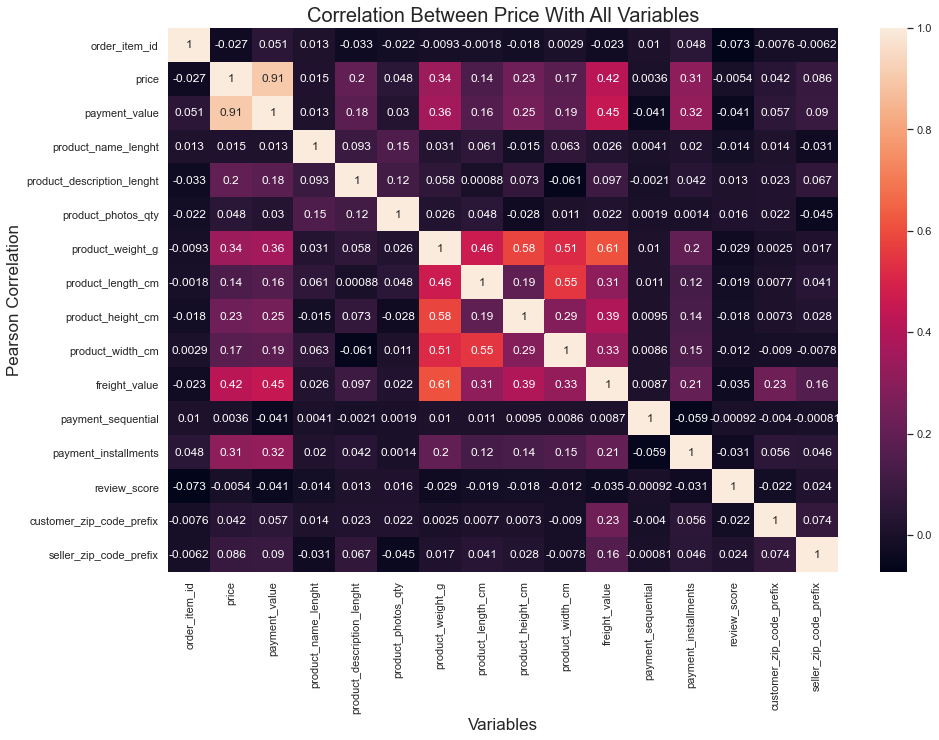

In [42]:
plt.figure(figsize=(15,10))
hm = sns.heatmap(result_olist_marged.corr(), annot = True)

hm.set_title("Correlation Between Price With All Variables", fontsize=20)
hm.set_xlabel("Variables", fontsize=17)
hm.set_ylabel("Pearson Correlation", fontsize=17)

plt.show()

Berdasarkan grafik diketathui
variabel yang paling berkaitan dengan variable price yaitu variable payment_value, dimana nilai pembayaran tersebut di kategorikan hampir sesuai dengan harga yang di berikan,
Sehingga sisa nilai payments_value berada di payment_installments

#### Payment Method

In [43]:
result_olist_marged['price_log'] = np.log(result_olist_marged['price'] + 1.5)

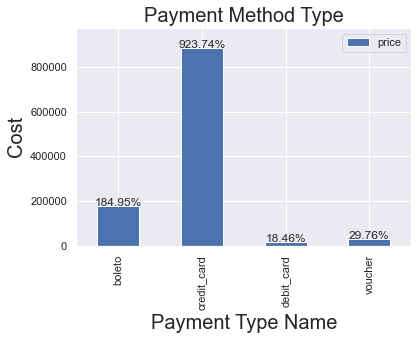

In [44]:
total = len(result_olist_marged)
result_olist_marged2= result_olist_marged.head(10000)

result_olist_marged2 = result_olist_marged2.groupby('payment_type').sum().plot(kind = 'bar', y = 'price')
result_olist_marged2.set_title("Payment Method Type", fontsize=20)
result_olist_marged2.set_xlabel("Payment Type Name", fontsize=20)
result_olist_marged2.set_ylabel("Cost", fontsize=20)

sizes = []
for p in result_olist_marged2.patches:
    height = p.get_height()
    sizes.append(height)
    result_olist_marged2.set_ylim(0, max(sizes) * 1.1)
    result_olist_marged2.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=12) 
    
plt.show()

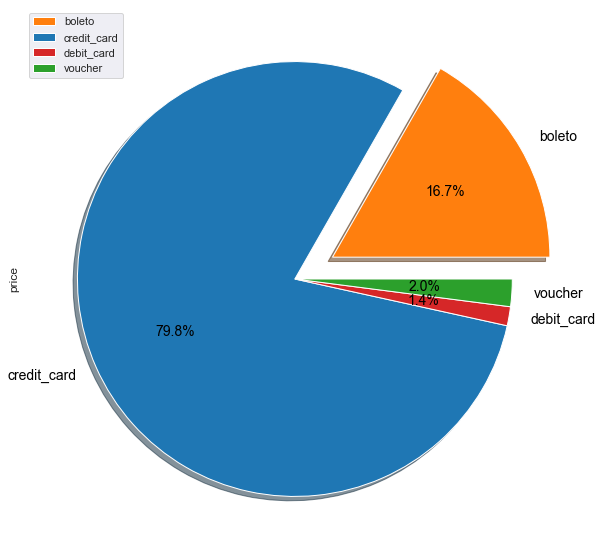

In [45]:
result_olist_marged3= result_olist_marged.head(70000)
myexplode = [0.2, 0, 0, 0]
mycolors = ["#FF7F0E", "#1F77B4", "#D62728", "#2CA02C"]
result_olist_marged3 = result_olist_marged3.groupby('payment_type').sum().plot(kind = 'pie', y = 'price',
                                                                               shadow = True,figsize=(15,10),
                                                                               explode = myexplode,
                                                                               colors= mycolors,
                                                                               autopct='%1.1f%%', fontsize = 14, 
                                                                               textprops = dict(color ="black"))

Pada Grafik di atas terlihat beberapa type dari jenis pembayaran yang sering digunakan. Pada nilai tertinggi, metode pembayaran yang sering digunakan yaitu credit card

#### Order Product_category

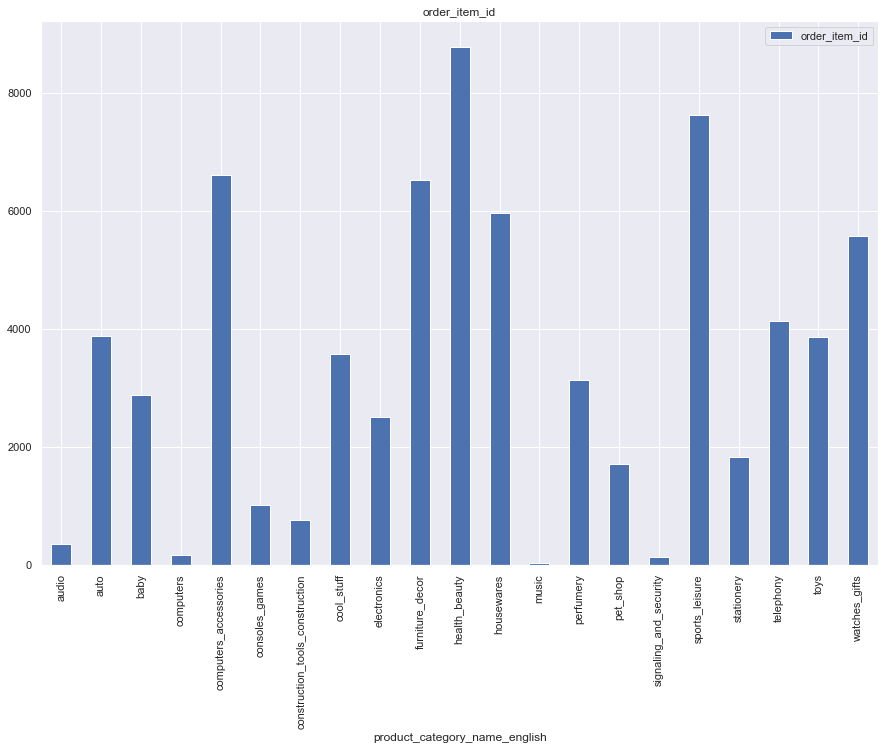

In [46]:
result_olist_marged3= result_olist_marged.head(70000)
result_olist_marged3 = result_olist_marged3.groupby('product_category_name_english').sum().plot(kind = 'bar', y = 'order_item_id',subplots=True, figsize=(15,10))

Pada Grafik di atas terlihat beberapa category dari product yang di jual pada E-Commerce Brazilian dan product yang sering terjual yaitu healthy_beuty

### Reviews Score

Text(0, 0.5, 'Counts')

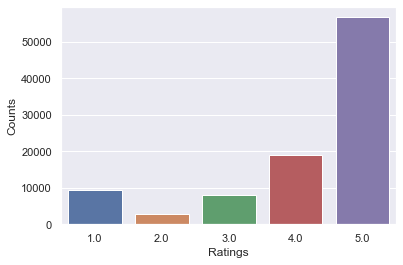

In [54]:
sns.barplot(x=result_olist_marged['review_score'].value_counts().index,y=result_olist_marged['review_score'].value_counts().values)
plt.xlabel('Ratings')
plt.ylabel('Counts')

### Region

#### Customer distribution

In [108]:
olist_customers = olist_customers.rename(columns={"customer_zip_code_prefix":"geolocation_zip_code_prefix"})
new_olist_customers= pd.merge(olist_customers, olist_geolocation, on="geolocation_zip_code_prefix", how="left")
new_olist_customers= new_olist_customers.drop_duplicates(subset ="customer_unique_id")
new_olist_customers = new_olist_customers.dropna( subset=["geolocation_lng"])
new_olist_customers = new_olist_customers.dropna( subset=["geolocation_lat"])
new_olist_customers= new_olist_customers.head(1000)

In [109]:
def cusMaps(default_location=[new_olist_customers.geolocation_lat.mean(), new_olist_customers.geolocation_lng.mean()],default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
base_map = cusMaps()
base_map
for index, info_location in new_olist_customers.iterrows():
    folium.Marker([info_location["geolocation_lat"], info_location["geolocation_lng"]], popup=info_location["customer_unique_id"]).add_to(base_map)
base_map    

Pada maps di atas terdapat titik penyebaran dari customer pada Brazilian E-Commerce, dan titik dominan customer berada di bagian tenggara Brasil, Rio de Janeiro adalah salah satu kota yang terdapat di bagian tenggara Brasil dan kota tersebut merupakan ibu kota negara Brasil

#### Seller Distribution

In [110]:
olist_sellers= olist_sellers.rename(columns={"seller_zip_code_prefix":"geolocation_zip_code_prefix"})
location_seller= pd.merge(olist_sellers, olist_geolocation, on="geolocation_zip_code_prefix")
location_seller= location_seller.drop_duplicates(subset ="seller_id")
location_seller = location_seller.dropna( subset=["geolocation_lat"])
location_seller = location_seller.dropna( subset=["geolocation_lng"])
location_seller=location_seller.head(100)

In [111]:
def SellerMaps(default_location=[location_seller.geolocation_lat.mean(), location_seller.geolocation_lng.mean()],default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
base_map = SellerMaps()
base_map
for index, info_location in location_seller.iterrows():
    folium.Marker([info_location["geolocation_lat"], info_location["geolocation_lng"]], popup=info_location["seller_id"]).add_to(base_map)
base_map

#### Pada maps di atas terdapat titik penyebaran dari seler pada Brazilian E-Commerce, dan titik dominan seler berada di bagian barat daya Brasil, Sao Paulo salah satu kota yang terdapat di bagian tenggara Brasil dan kota tersebut merupakan ibu kota negara Brasil